In [6]:
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def temperature(x):
    value = x*x - 4*x + 4
    return value

def _compute_values_in_interval(f, xmin, xmax, n):
    x = np.linspace(xmin, xmax, n)
    y = []
    for xi in x:
        yi = f(xi)
        y.append(yi)
    y = np.array(y)
    return y

In [10]:
xmin = 0
xmax = 10
n = 50
y = _compute_values_in_interval(temperature, xmin, xmax, n)
x = np.linspace(xmin, xmax, n)

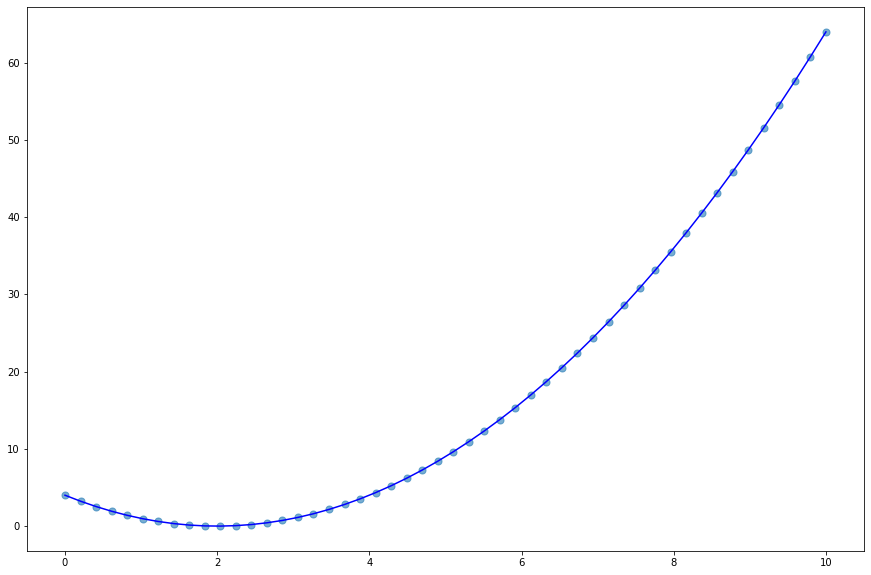

In [11]:
_ = plt.figure(figsize=(15, 10))
plt.plot(x, y, "blue")
plt.scatter(x, y, s=50, alpha=0.6)
plt.show()

In [13]:
# f'(x) = lim[dx -> 0] ( f(x + dx) - f(x) ) / dx
dx = x[1] - x[0]
x0 = x[1]
temperature_change = (temperature(x0 + dx) - temperature(x0)) / dx
temperature_change

-3.387755102040815

In [15]:
def derivative1(f, x0, dx):
    value = (f(x0 + dx) - f(x0)) / dx
    return value

def derivative2(f, x0, dx):
    value = (f(x0) - f(x0 - dx)) / dx
    return value

def derivative3(f, x0, dx):
    value = (f(x0 + dx) - f(x0 - dx)) / (2 * dx)
    return value

In [16]:
dx = x[1] - x[0]
dydx1 = []
for xi in x:
    dydx1i = derivative1(temperature, xi, dx)
    dydx1.append(dydx1i)
dydx1 = np.array(dydx1)

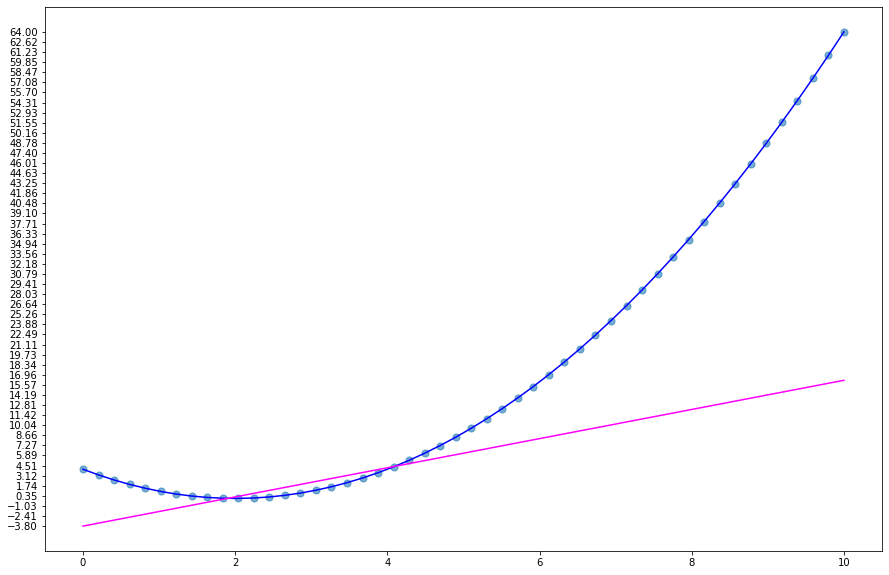

In [20]:
_ = plt.figure(figsize=(15, 10))
plt.plot(x, y, "blue")
plt.plot(x, dydx1, "magenta")
plt.scatter(x, y, s=50, alpha=0.6)
plt.yticks(np.linspace(np.min(dydx1), np.max(y), n))
plt.show()

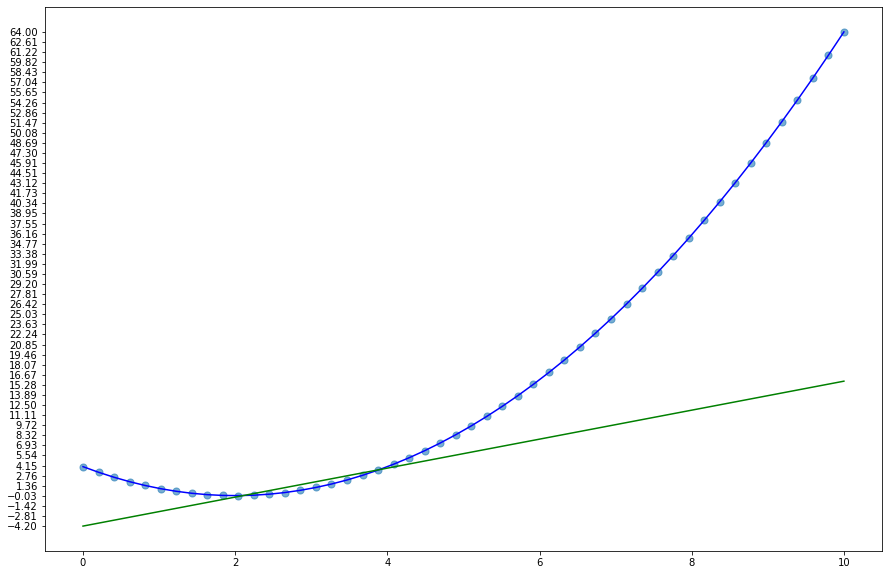

In [22]:
dx = x[1] - x[0]
dydx2 = []
for xi in x:
    dydx2i = derivative2(temperature, xi, dx)
    dydx2.append(dydx2i)
dydx2 = np.array(dydx2)

_ = plt.figure(figsize=(15, 10))
plt.plot(x, y, "blue")
plt.plot(x, dydx2, "green")
plt.scatter(x, y, s=50, alpha=0.6)
plt.yticks(np.linspace(np.min(dydx2), np.max(y), n))
plt.show()

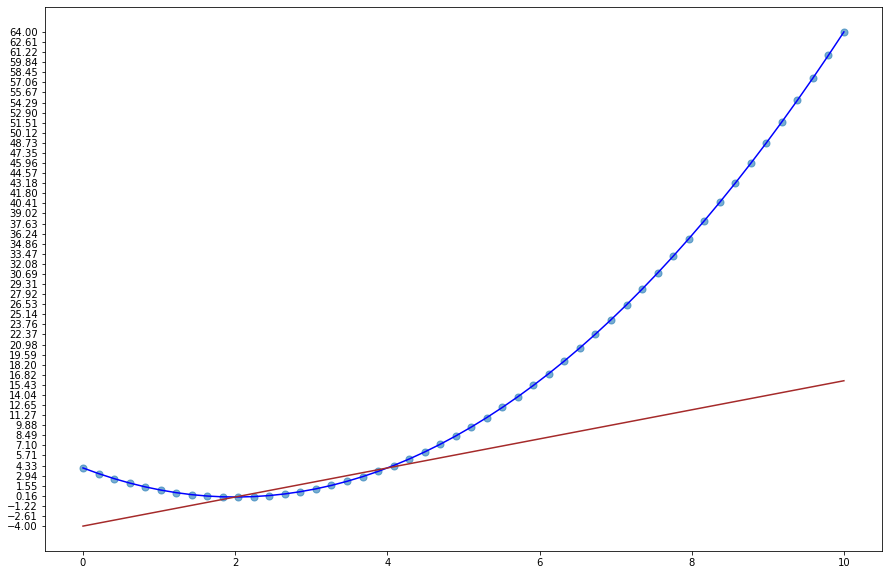

In [23]:
dx = x[1] - x[0]
dydx3 = []
for xi in x:
    dydx3i = derivative3(temperature, xi, dx)
    dydx3.append(dydx3i)
dydx3 = np.array(dydx3)

_ = plt.figure(figsize=(15, 10))
plt.plot(x, y, "blue")
plt.plot(x, dydx3, "brown")
plt.scatter(x, y, s=50, alpha=0.6)
plt.yticks(np.linspace(np.min(dydx3), np.max(y), n))
plt.show()

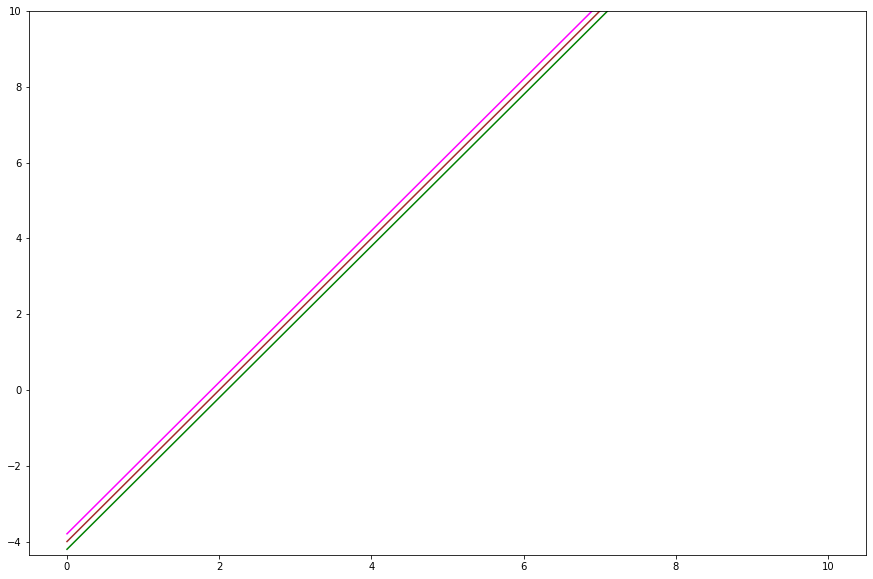

In [25]:
_ = plt.figure(figsize=(15, 10))
plt.plot(x, dydx1, "magenta")
plt.plot(x, dydx2, "green")
plt.plot(x, dydx3, "brown")
plt.ylim(-4.35, 10)
plt.show()

In [26]:
dydx1

array([-3.79591837, -3.3877551 , -2.97959184, -2.57142857, -2.16326531,
       -1.75510204, -1.34693878, -0.93877551, -0.53061224, -0.12244898,
        0.28571429,  0.69387755,  1.10204082,  1.51020408,  1.91836735,
        2.32653061,  2.73469388,  3.14285714,  3.55102041,  3.95918367,
        4.36734694,  4.7755102 ,  5.18367347,  5.59183673,  6.        ,
        6.40816327,  6.81632653,  7.2244898 ,  7.63265306,  8.04081633,
        8.44897959,  8.85714286,  9.26530612,  9.67346939, 10.08163265,
       10.48979592, 10.89795918, 11.30612245, 11.71428571, 12.12244898,
       12.53061224, 12.93877551, 13.34693878, 13.75510204, 14.16326531,
       14.57142857, 14.97959184, 15.3877551 , 15.79591837, 16.20408163])

In [28]:
def bisect(g, xn, xp, eps_x, eps_g, n_iter):
    if g(xn) > 0 or g(xp) < 0:
        raise ValueError("Interval bounds are not correct.")

    xg = (xp + xn) / 2
    fg = g(xg)
    n_eval = 1

    while (np.abs(xg - xp) > eps_x or np.abs(fg) > eps_g) and n_eval <= n_iter:
        if fg > 0:
            xp = xg
        else:
            xn = xg

        xg = (xp + xn) / 2
        fg = g(xg)
        n_eval = n_eval + 1

    return xg, fg, n_eval

In [30]:
def f(x):
    return -2 + 2.5 * x

xn = 0
xp = 2
n_iter = 1000
eps_x = 0.01
eps_g = 0.01

bisect(f, xn, xp, eps_x, eps_g, n_iter)

(0.80078125, 0.001953125, 9)

In [44]:
eps_x = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5]
eps_g = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.25, 0.5]

errors = []
solutions = []
number_of_iterations = []
eps_x_params = []
eps_g_params = []

for ex in eps_x:
    for eg in eps_g:
        root, value, iter = bisect(f, xn, xp, ex, eg, n_iter)
        errors.append(value)
        solutions.append(root)
        number_of_iterations.append(iter)
        eps_x_params.append(ex)
        eps_g_params.append(eg)

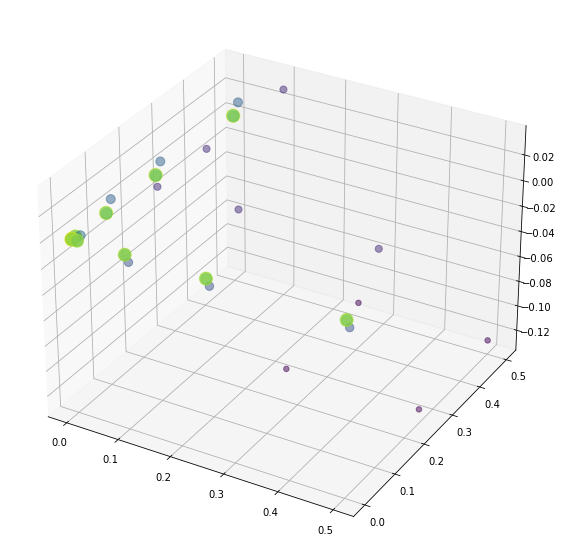

In [51]:
size = [10 * ni for ni in number_of_iterations]
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(projection="3d")
ax.scatter(eps_x_params, eps_g_params, errors, c=number_of_iterations, s=size, alpha=0.5)
plt.show()

In [52]:
def find_extremes_bisect(f, fprime, xn, xp, dx=0.01, eps_x=0.01, eps_g=0.01, n_iter=1000):
    if fprime(f=f, x0=xn, dx=dx) > 0 or fprime(f=f, x0=xp, dx=dx) < 0:
        raise ValueError("Interval bounds are not correct.")

    xg = (xp + xn) / 2
    fg = fprime(f=f, x0=xg, dx=dx)
    n_eval = 1

    while (np.abs(xg - xp) > eps_x or np.abs(fg) > eps_g) and n_eval <= n_iter:
        if fg > 0:
            xp = xg
        else:
            xn = xg

        xg = (xp + xn) / 2
        fg = fprime(f=f, x0=xg, dx=dx)
        n_eval = n_eval + 1

    return xg, fg, n_eval

In [55]:
root, value, iters = find_extremes_bisect(temperature, derivative3, 0, 10)
print(f"One possible extreme point is at x = {root}. Error = {value * 100} %. Computed in {iters} iterations.")

if root:
    extreme_value = temperature(root)
    print(f"The extreme value of the function is = {extreme_value}.")

One possible extreme point is at x = 2.001953125. Error = 0.39062499999964473 %. Computed in 10 iterations.
The extreme value of the function is = 3.814697265625e-06.


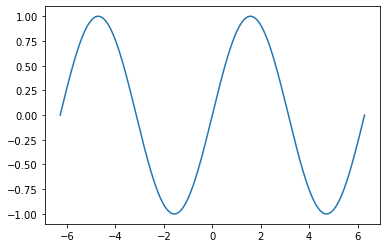

In [59]:
def circling(x):
    return np.sin(x)

x = np.linspace(-2*np.pi, 2*np.pi, 1000)
y = _compute_values_in_interval(circling, -2*np.pi, 2*np.pi, 1000)
_ = plt.figure()
plt.plot(x, y)
plt.show()

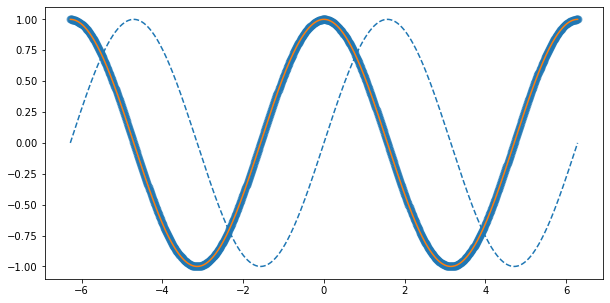

In [66]:
y_prime = []
for xi in x:
    dydx = derivative3(circling, xi, 0.01)
    y_prime.append(dydx)
y_prime = np.array(y_prime)
_ = plt.figure(figsize=(10, 5))
plt.plot(x, y, "--", lw=1.5)
plt.plot(x, y_prime)
plt.scatter(x, np.cos(x), s=50, alpha=0.5)
plt.show()

In [84]:
root, value, iters = find_extremes_bisect(circling, derivative3, -2.5*np.pi-0.01, 2.5*np.pi-0.01)
print(f"One possible extreme point is at x = {root}. Error = {value * 100} %. Computed in {iters} iterations.")

if root:
    extreme_value = circling(root)
    print(f"The extreme value of the function is = {extreme_value}.")

One possible extreme point is at x = -1.5669904997039255. Error = 0.3805754473529266 %. Computed in 11 iterations.
The extreme value of the function is = -0.9999927578488182.


In [83]:
derivative3(circling, 2.5*np.pi-0.1, 0.01)

0.09983175276486733

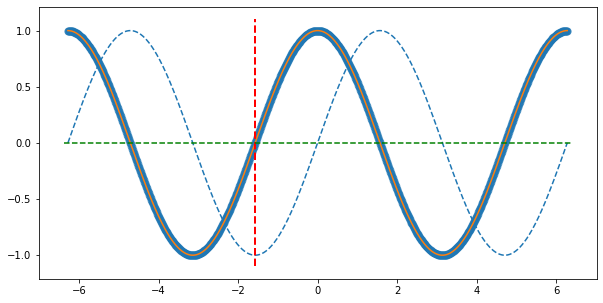

In [91]:
y_prime = []
for xi in x:
    dydx = derivative3(circling, xi, 0.01)
    y_prime.append(dydx)
y_prime = np.array(y_prime)
_ = plt.figure(figsize=(10, 5))
plt.plot(x, y, "--", lw=1.5)
plt.plot(x, y_prime)
plt.scatter(x, np.cos(x), s=50, alpha=0.5)
plt.vlines(root, -1.1, 1.1, "red", "--", lw=2)
plt.hlines(0, -2*np.pi-0.1, 2*np.pi+0.1, "green", "--", lw=1.5)
plt.show()

In [99]:
xmin = -2.5*np.pi - 0.01
xmax = 2.5*np.pi - 0.01

x = np.linspace(xmin, xmax, 1000)
y = []
for xi in x:
    yi = derivative3(circling, xi, 0.01)
    y.append(yi)

In [96]:
# TODO: Try to find all solutions for a periodic function, i.e. circling using the find_extremes_bisect() method
xns = []
xps = []
starting_sign = np.sign(y[0])

x_index = 0
for i in range(1, len(y)):
    current_sign = np.sign(y[i])
    if starting_sign != current_sign:
        xns.append(x[x_index])
        xps.append(x[i])
        x_index = i
        starting_sign = current_sign
xns, xps

([-7.863981633974483,
  -7.848257947019579,
  -4.703520556038805,
  -1.5587831650580313,
  1.5859542259227428],
 [-7.848257947019579,
  -4.703520556038805,
  -1.5587831650580313,
  1.5859542259227428,
  4.714967929948612])

In [98]:
roots = []
values = []
iters = []

for i in range(len(xns)):
    root, value, iter = find_extremes_bisect(circling, derivative3, xns[i], xps[i])
    roots.append(root)
    values.append(values)
    iters.append(iters)

ValueError: Interval bounds are not correct.

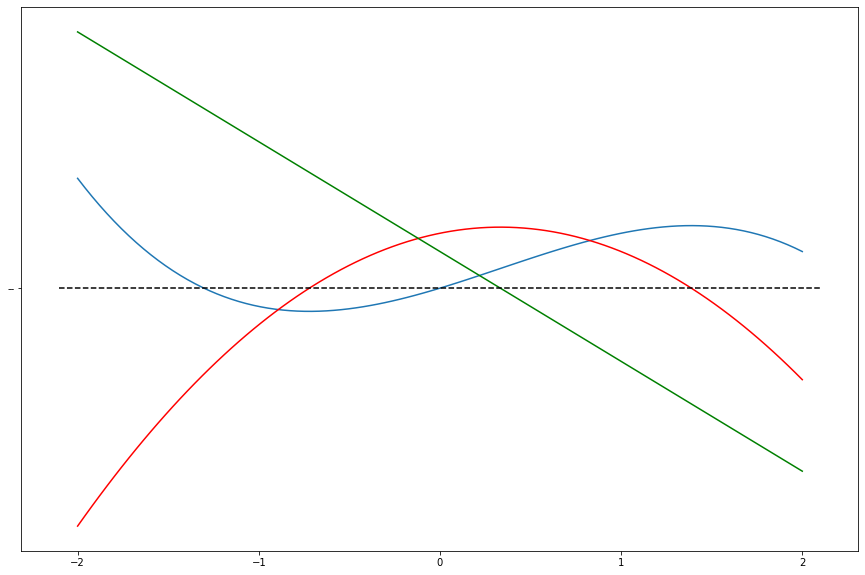

In [106]:
def cube(x):
    return -x*x*x + x*x + 3*x

def cube_prime(x):
    return -3*x*x + 2*x + 3

def cube_second(x):
    return -6*x + 2

x = np.linspace(-2, 2, 100)
y1 = _compute_values_in_interval(cube, -2, 2, 100)
y2 = _compute_values_in_interval(cube_prime, -2, 2, 100)
y3 = _compute_values_in_interval(cube_second, -2, 2, 100)

_ = plt.figure(figsize=(15, 10))
plt.plot(x, y1)
plt.plot(x, y2, "red", "--", lw=1.5)
plt.plot(x, y3, "green", "--", lw=1.5)
plt.hlines(0, -2.1, 2.1, "black", "--")
plt.show()